In [47]:
import pandas as pd
import numpy as np


In [48]:
# Read in the data
df = pd.read_csv("../00_Source/merged_pop_drug_death.csv")

# number of counties per state
df.groupby("State")["County"].nunique()


State
AZ    10
FL    43
GA    42
MA    12
MI    33
MO    26
NC    55
OH    63
PA    49
TX    56
VA    41
WA    21
Name: County, dtype: int64

In [49]:
# total number of counties
df["County"].nunique()


385

In [50]:
# mean death_rate
df["Deaths"].describe()


count    3531.000000
mean       47.850184
std        70.083434
min        10.000000
25%        14.000000
50%        21.000000
75%        48.000000
max       706.000000
Name: Deaths, dtype: float64

In [51]:
# mean of deaths per county
df.groupby(["State", "County"])["Deaths"].mean().sort_values(ascending=False)


State  County             
AZ     Maricopa County        571.153846
PA     Philadelphia County    400.615385
TX     Harris County          387.538462
MI     Wayne County           311.153846
FL     Broward County         256.769231
                                 ...    
NC     Edgecombe County        10.000000
GA     Dougherty County        10.000000
OH     Hocking County          10.000000
MI     Manistee County         10.000000
VA     Carroll County          10.000000
Name: Deaths, Length: 451, dtype: float64

In [52]:
# number of counties with a mean death rate == 10, the minimum
df.groupby(["State", "County"])["Deaths"].mean().sort_values(ascending=False).loc[
    lambda x: x == 10
].count()


28

In [53]:
# counties with highest drug death rates by county and state
df.groupby(["State", "County"])["Death_Rate_per_100000"].mean().sort_values(
    ascending=False
).head(10)


State  County          
VA     Dickenson County    64.817005
MO     Pemiscot County     60.122431
NC     Cherokee County     51.308053
OH     Fayette County      48.896358
VA     Buchanan County     47.335277
OH     Pike County         44.171170
GA     Haralson County     44.131748
VA     Lee County          43.706294
TX     Aransas County      42.744176
GA     Madison County      42.289259
Name: Death_Rate_per_100000, dtype: float64

In [54]:
# counties with highest drug death rates by county and state
df.groupby(["State", "County"])["Deaths"].mean().sort_values(ascending=False).head(10)


State  County             
AZ     Maricopa County        571.153846
PA     Philadelphia County    400.615385
TX     Harris County          387.538462
MI     Wayne County           311.153846
FL     Broward County         256.769231
WA     King County            248.615385
PA     Allegheny County       239.230769
FL     Palm Beach County      234.461538
TX     Dallas County          232.538462
FL     Pinellas County        213.461538
Name: Deaths, dtype: float64

In [55]:
# subset for each state and their controls
flor_cont = df[df["State"].isin(["FL", "MI", "NC", "OH"])].copy()
wash_cont = df[df["State"].isin(["WA", "MO", "GA", "AZ"])].copy()
texas_cont = df[df["State"].isin(["TX", "PA", "VA", "MA"])].copy()

# make sure the shapes from the 3 groups add up to the total in df
assert len(flor_cont) + len(wash_cont) + len(texas_cont) == len(df)


flor_cont["State"].unique()
wash_cont["State"].unique()
texas_cont["State"].unique()


array(['PA', 'VA', 'TX', 'MA'], dtype=object)

In [56]:
# indicator for each state depending on whether they had a policy enacted or not
flor_cont["case"] = np.where(flor_cont["State"] == "FL", "Policy", "No policy")
wash_cont["case"] = np.where(wash_cont["State"] == "WA", "Policy", "No policy")
texas_cont["case"] = np.where(texas_cont["State"] == "TX", "Policy", "No policy")

# merge the 3 groups into one dataframe
merged_test = pd.concat([flor_cont, wash_cont, texas_cont])


In [57]:
# another indicator for when policy took effect(pre/post)

flor_cont["policy"] = np.where(flor_cont["Year"] >= 2010, "post", "pre")
wash_cont["policy"] = np.where(wash_cont["Year"] >= 2011, "post", "pre")
texas_cont["policy"] = np.where(texas_cont["Year"] >= 2007, "post", "pre")


In [58]:
flor_cont.head()


,County,Year,State,Deaths,Population,Death_Rate_per_100000,case,policy
2,Adams County,2012,OH,10.0,28288.0,35.350679,No policy,post
3,Adams County,2014,OH,10.0,28060.0,35.637919,No policy,post
4,Adams County,2015,OH,13.0,27919.0,46.563272,No policy,post
5,Alachua County,2003,FL,11.0,227022.0,4.845345,Policy,pre
6,Alachua County,2007,FL,17.0,242685.0,7.004965,Policy,pre


In [59]:
flor_cont.groupby(["case", "policy"])["Death_Rate_per_100000"].describe()


count       mean       std       min        25%        50%  \
case      policy                                                               
No policy post    598.0  18.200877  9.179584  3.790736  11.511726  16.543077   
          pre     484.0  12.894487  6.711230  2.654484   7.858181  11.254874   
Policy    post    217.0  14.888571  6.403795  3.900626  10.522993  14.080798   
          pre     233.0  14.336241  5.896722  3.927344  10.163991  14.116938   

                        75%        max  
case      policy                        
No policy post    22.341163  62.534486  
          pre     16.331053  43.316296  
Policy    post    18.560747  40.791465  
          pre     17.596391  35.883590

In [60]:
wash_cont.groupby(["case", "policy"])["Death_Rate_per_100000"].describe()
# seing the same trend for washington


count       mean       std       min        25%        50%  \
case      policy                                                               
No policy post    265.0  15.793801  7.690612  4.735205  10.394038  13.813722   
          pre     314.0  13.049157  7.648301  3.054688   7.724711  11.261133   
Policy    post     79.0  13.877070  4.711960  5.681933  10.254377  13.476780   
          pre     119.0  13.206149  5.351372  4.250400   8.987646  12.949708   

                        75%        max  
case      policy                        
No policy post    19.580328  42.552545  
          pre     15.635356  60.122431  
Policy    post    16.518335  26.389608  
          pre     16.041144  30.684983

In [61]:
texas_cont.groupby(["case", "policy"])["Death_Rate_per_100000"].describe()


count       mean       std       min       25%        50%  \
case      policy                                                              
No policy post    582.0  16.392112  9.075810  3.143125  9.975630  14.187146   
          pre     210.0  12.542519  8.412229  1.681607  7.046111  10.757198   
Policy    post    320.0  10.343030  4.996150  1.806990  7.211501   9.499604   
          pre     110.0  10.006908  6.624014  1.438121  5.952917   8.970678   

                        75%        max  
case      policy                        
No policy post    20.688578  68.874836  
          pre     14.516060  57.788158  
Policy    post    12.243077  35.545314  
          pre     11.444739  42.744176

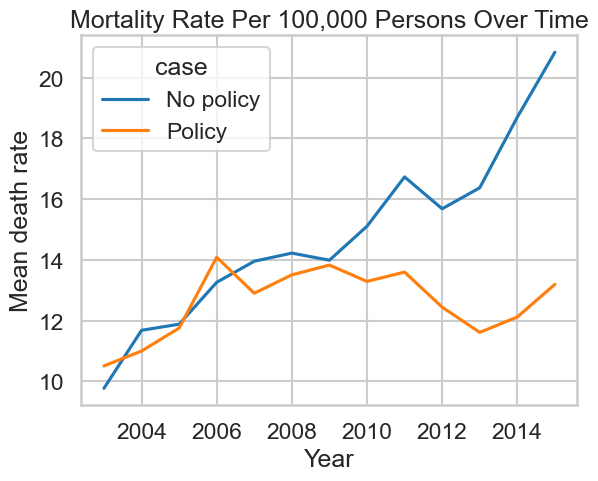

In [62]:
# states death trends over time
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("talk")

# death rate over time for all states depending on whether they had a policy or not

merged_test.groupby(["Year", "case"])["Death_Rate_per_100000"].mean().unstack().plot()
plt.title("Mortality Rate Per 100,000 Persons Over Time")
plt.ylabel("Mean death rate")
plt.xlabel("Year")
plt.show()
